# Cerno Project

In [85]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached scipy-1.7.1-cp39-cp39-win_amd64.whl (33.8 MB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)


In [1]:
print('project')

project


In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from datetime import datetime

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix


**Data Cleaning**

In [2]:
data_dir = 'C:/Users/Thomas/OneDrive/Desktop/DataPaper/'

users = [user for user in os.listdir(data_dir) if user.startswith('user_')]
print(users)

for user in users:
    
    sleep_path = os.path.join(data_dir, user, 'sleep.csv')
    # Index (unnamed), 'In Bed Date', 'In Bed Time', 'Out Bed Date', 'Out Bed Time'
    sleep_df = pd.read_csv(sleep_path, index_col=0, usecols=[0,1,2,3,4])
    display(sleep_df)
    
    signals_path = os.path.join(data_dir, user, 'Actigraph.csv')
    # Index (unnamed), 'Axis1', 'Axis2', 'Axis3', 'Steps', 'HR'
    signals_df = pd.read_csv(signals_path, index_col=[0], usecols=[0,1,2,3,4,5])
    display(signals_df)
   
    # Data cleaning
    if sleep_df.empty or sleep_df.isnull().any().any() or signals_df.empty or signals_df.isnull().any().any():
        print(user)
        users.remove(user)


print(len(users))


['user_1', 'user_10', 'user_11', 'user_12', 'user_13', 'user_14', 'user_15', 'user_16', 'user_17', 'user_18', 'user_19', 'user_2', 'user_20', 'user_21', 'user_22', 'user_3', 'user_4', 'user_5', 'user_6', 'user_7', 'user_8', 'user_9']


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:46,2,03:31
1,2,03:57,2,07:30


,Axis1,Axis2,Axis3,Steps,HR
82,0,0,0,0,68.0
83,11,4,7,1,68.0
84,0,21,10,0,68.0
85,0,1,24,0,68.0
86,34,14,63,1,154.0
...,...,...,...,...,...
84985,31,0,31,1,119.0
84986,34,0,17,0,121.0
84987,7,4,3,0,123.0
84988,12,50,13,0,124.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,02:40,2,08:09


,Axis1,Axis2,Axis3,Steps,HR
250,0,0,8,0,171.0
251,43,43,64,0,171.0
252,16,2,53,1,171.0
285,0,0,0,0,84.0
286,0,0,0,0,84.0
...,...,...,...,...,...
87584,15,22,29,0,100.0
87585,108,106,55,1,100.0
87586,35,60,100,1,100.0
87587,93,63,145,1,100.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time


,Axis1,Axis2,Axis3,Steps,HR
39,53,61,106,1,213.0
40,34,0,21,0,213.0
41,0,0,35,0,213.0
42,0,0,4,0,213.0
43,0,0,0,0,213.0
...,...,...,...,...,...
87085,67,31,76,0,91.0
87086,75,113,80,0,91.0
87087,45,101,66,1,91.0
87088,188,166,271,0,91.0


user_11


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,1,23:41,1,05:04


,Axis1,Axis2,Axis3,Steps,HR
8,55,39,133,0,93.0
9,0,0,33,0,93.0
28,0,0,0,0,15.0
29,4,1,7,1,94.0
30,58,42,31,1,94.0
...,...,...,...,...,...
84208,0,0,0,0,90.0
84209,0,0,0,0,90.0
84210,0,0,0,0,90.0
84211,0,0,0,0,90.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:08,2,07:00


,Axis1,Axis2,Axis3,Steps,HR
129,0,0,0,0,100.0
130,0,0,0,0,101.0
131,0,0,0,0,101.0
132,0,0,0,0,101.0
133,0,0,0,0,101.0
...,...,...,...,...,...
85327,0,0,0,0,122.0
85328,0,0,0,0,122.0
85329,0,0,0,0,122.0
85330,0,0,0,0,122.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,01:15,2,05:39


,Axis1,Axis2,Axis3,Steps,HR
28,99,32,94,0,207.0
29,2,54,131,1,207.0
30,114,95,68,0,207.0
31,57,30,88,0,207.0
32,72,105,112,1,207.0
...,...,...,...,...,...
91795,0,0,0,0,145.0
91796,0,0,0,0,145.0
91797,0,0,0,0,146.0
91798,0,0,0,0,152.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:22,2,07:58


,Axis1,Axis2,Axis3,Steps,HR
218,2,35,39,0,30.0
219,31,119,68,1,30.0
220,27,46,73,0,30.0
221,14,48,30,0,30.0
222,19,73,10,1,30.0
...,...,...,...,...,...
92395,0,0,0,0,126.0
92396,0,0,0,0,122.0
92397,0,0,0,0,121.0
92398,0,0,0,0,118.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:44,2,06:36


,Axis1,Axis2,Axis3,Steps,HR
10,14,0,58,1,228.0
11,0,0,19,0,215.0
12,64,116,50,0,215.0
13,10,208,133,1,215.0
14,36,56,78,0,215.0
...,...,...,...,...,...
91823,0,0,0,0,149.0
91824,0,0,0,0,151.0
91825,0,0,0,0,151.0
91826,0,0,0,0,153.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:55,2,06:53


,Axis1,Axis2,Axis3,Steps,HR
90,83,0,26,0,227.0
91,83,64,26,0,227.0
92,45,12,22,1,227.0
93,8,0,4,0,227.0
94,0,0,0,0,180.0
...,...,...,...,...,...
86374,0,0,0,0,87.0
86375,0,0,0,0,87.0
86376,0,0,0,0,87.0
86377,0,0,0,0,87.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,1,22:56,1,06:35


,Axis1,Axis2,Axis3,Steps,HR
69,87,257,110,1,79.0
70,17,211,89,0,79.0
71,28,55,0,1,79.0
72,0,23,0,0,77.0
73,0,0,0,0,74.0
...,...,...,...,...,...
85575,0,0,0,0,100.0
85576,0,0,0,0,100.0
85577,0,0,0,0,100.0
85578,0,0,0,0,100.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:50,2,06:22


,Axis1,Axis2,Axis3,Steps,HR
201,19,120,72,1,136.0
202,89,188,113,1,136.0
203,107,30,94,1,94.0
204,127,65,120,1,94.0
205,68,185,65,1,94.0
...,...,...,...,...,...
85509,15,104,71,1,86.0
85510,0,22,20,0,86.0
85511,0,0,0,0,86.0
85512,0,0,0,0,86.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,01:03,2,08:19


,Axis1,Axis2,Axis3,Steps,HR
23,275,86,67,1,72.0
24,93,112,45,1,69.0
25,69,39,61,0,68.0
26,66,86,140,1,68.0
27,50,44,38,0,69.0
...,...,...,...,...,...
84913,0,0,0,0,102.0
84914,0,0,0,0,102.0
84915,0,0,0,0,102.0
84916,0,0,0,0,102.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,02:19,2,07:16


,Axis1,Axis2,Axis3,Steps,HR
23,19,0,0,0,98.0
24,49,0,5,1,97.0
25,108,34,3,0,153.0
26,45,5,0,1,166.0
27,99,0,46,0,166.0
...,...,...,...,...,...
83208,2,0,9,0,149.0
83209,4,0,24,0,149.0
83210,13,0,42,1,149.0
83211,0,5,0,0,149.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,01:06,2,07:04


,Axis1,Axis2,Axis3,Steps,HR
9,0,0,0,0,70.0
10,0,0,0,0,71.0
11,0,0,0,0,71.0
12,0,0,0,0,71.0
13,0,0,0,0,71.0
...,...,...,...,...,...
84411,90,115,80,0,72.0
84412,33,49,28,1,72.0
84413,32,25,34,0,72.0
84414,59,28,188,1,72.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,1,22:29,1,05:52


,Axis1,Axis2,Axis3,Steps,HR
251,14,13,134,0,93.0
252,34,0,59,1,93.0
253,65,15,173,0,94.0
254,35,17,110,1,94.0
255,62,14,191,0,93.0
...,...,...,...,...,...
89315,0,0,0,0,88.0
89316,0,0,0,0,88.0
89317,0,0,0,0,88.0
89318,0,0,0,0,89.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:57,2,07:10


,Axis1,Axis2,Axis3,Steps,HR
113,77,140,64,1,71.0
114,65,137,48,1,73.0
115,78,51,34,2,73.0
116,138,198,21,0,73.0
117,36,50,21,1,73.0
...,...,...,...,...,...
88234,0,0,0,0,74.0
88235,0,0,0,0,74.0
88236,0,0,0,0,73.0
88237,0,0,0,0,74.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,1,23:56,1,06:42


,Axis1,Axis2,Axis3,Steps,HR
130,15,84,66,1,228.0
131,39,101,81,0,228.0
132,55,99,28,0,81.0
133,46,103,84,0,86.0
134,36,14,24,1,104.0
...,...,...,...,...,...
88562,0,0,0,0,94.0
88563,0,0,0,0,94.0
88564,0,0,0,0,94.0
88565,0,0,0,0,93.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,02:27,2,09:02


,Axis1,Axis2,Axis3,Steps,HR
180,38,1,95,0,68.0
181,15,11,36,0,67.0
182,21,17,63,2,67.0
183,39,0,48,0,67.0
184,28,0,22,1,67.0
...,...,...,...,...,...
85944,0,0,0,0,122.0
85945,0,0,0,0,122.0
85946,164,30,59,1,122.0
85947,102,26,53,1,122.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:28,2,08:02


,Axis1,Axis2,Axis3,Steps,HR
145,49,0,74,0,78.0
146,173,8,167,0,77.0
147,211,51,276,1,77.0
148,107,93,86,1,76.0
149,258,151,287,2,75.0
...,...,...,...,...,...
86876,0,0,0,0,88.0
86877,0,0,0,0,87.0
86878,0,0,0,0,87.0
86879,0,0,0,0,87.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:17,2,07:13


,Axis1,Axis2,Axis3,Steps,HR
189,37,23,49,0,92.0
190,3,24,94,1,90.0
191,30,4,120,1,90.0
192,33,6,113,1,89.0
193,14,1,80,1,88.0
...,...,...,...,...,...
83891,0,0,0,0,72.0
83892,0,0,0,0,72.0
83893,0,0,0,0,72.0
83894,0,0,0,0,72.0


,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time
0,2,00:30,2,11:00


,Axis1,Axis2,Axis3,Steps,HR
221,95,124,31,1,126.0
222,49,40,16,0,109.0
223,44,27,20,0,106.0
224,8,2,11,1,101.0
225,16,29,16,1,99.0
...,...,...,...,...,...
84083,0,0,0,0,85.0
84090,0,0,0,0,90.0
84091,0,0,0,0,90.0
84092,0,0,0,0,90.0


21


In [370]:
len(users)

21

**Splitting users in training, validation and testing**

In [3]:
train_users, test_users = train_test_split(users, test_size=0.2, random_state=42)
val_users, test_users = train_test_split(test_users, test_size=0.5, random_state=42)
print('Training users: %s, Validation users: %s, Testing users: %s' % (len(train_users), len(val_users), len(test_users)))
print(train_users)
print(val_users)
print(test_users)






Training users: 16, Validation users: 2, Testing users: 3
['user_15', 'user_20', 'user_13', 'user_7', 'user_5', 'user_22', 'user_12', 'user_19', 'user_9', 'user_14', 'user_21', 'user_17', 'user_2', 'user_3', 'user_8', 'user_16']
['user_1', 'user_10']
['user_6', 'user_18', 'user_4']


**Visualising data and statistics**

,Axis1,Axis2,Axis3,Steps,HR
Axis1,1.000000,0.706767,0.561763,0.526950,0.223366
Axis2,0.706767,1.000000,0.536435,0.494951,0.216518
Axis3,0.561763,0.536435,1.000000,0.424636,0.157589
Steps,0.526950,0.494951,0.424636,1.000000,0.202111
HR,0.223366,0.216518,0.157589,0.202111,1.000000


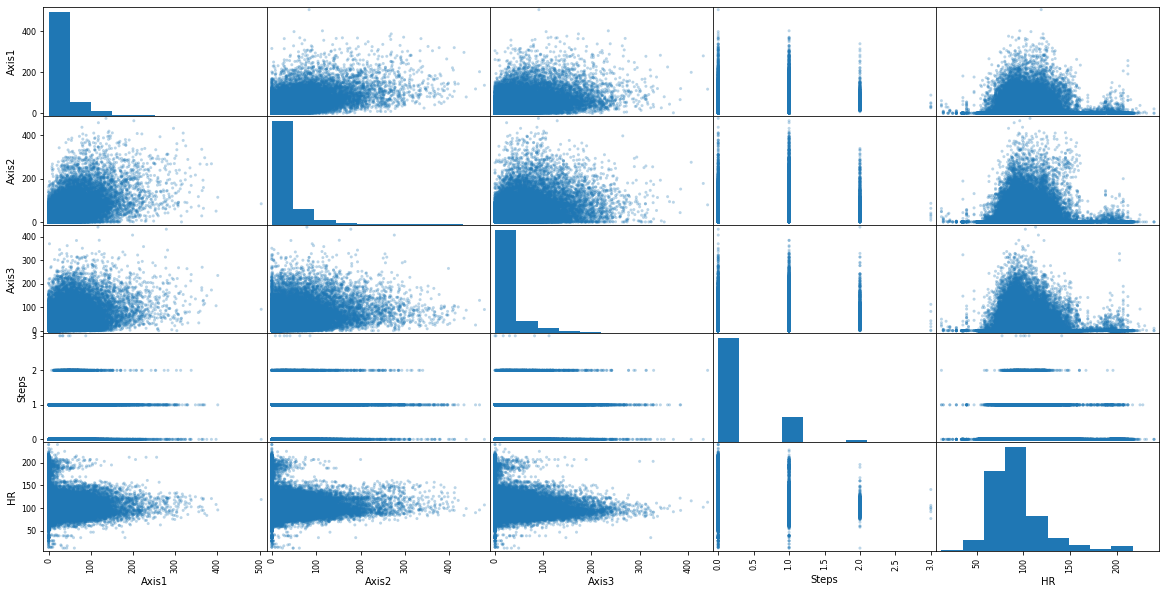

In [4]:
example = os.path.join(data_dir, train_users[0],'Actigraph.csv')

example = pd.read_csv(example, index_col=0, usecols=[0,1,2,3,4,5])

scatter_matrix(example[example.columns], figsize=(20,10), alpha=0.3)

display(example.corr())

**X DATA TRANSFORMATIONS**

In [5]:

class MissingDataValues(BaseEstimator, TransformerMixin):
    def __init__(self,):
        self.column_names=['Axis1','Axis2','Axis3','Steps','HR']
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        missing_index = [i for i in range(X.index.values[0], max(X.index.values)) if i not in X.index.values]
        df_missing = pd.DataFrame(np.nan, index=missing_index, 
                          columns=self.column_names)
        
        df_complete = pd.concat([df_missing, X]).sort_index()
        df_complete.ffill(inplace=True) # Propogate last non-nan observation forward
#         df_complete.bfill(inplace=True) # Backpropagate last non-nan observation (for nan at start)
        return df_complete


# class StandardizeData



# class SlidingWindow(BaseEstimator, TransformerMixin):
#     def __init__(self,):
#         self.window_size = 10 # Window size in seconds
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
        

        
        
# ~~~~~~~~~~~~~~ STANDARDIZE
        

# missing_data_values = MissingDataValues()
# display(x)
# df = missing_data_values.fit_transform(x)
# df


**Y DATA TRANSFORMATIONS**

In [6]:
class ComputeSleepLabels(BaseEstimator, TransformerMixin):
    def __init__(self, signal_length, signal_start_timestamp):
        self.signal_length = signal_length
        self.signal_start_timestamp = signal_start_timestamp
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        
        df_labels = pd.DataFrame(np.zeros(shape=(self.signal_length,1)), columns=['Bed Time'])
        
        for index, row in X.iterrows():
            bed_start = str(row['In Bed Date']) + ':' + row['In Bed Time']

            bed_duration = row['Total Minutes in Bed'] * 60

            bed_start_seconds =  datetime.strptime(bed_start, '%d:%H:%M') \
                                - datetime.strptime(self.signal_start_timestamp, '%d:%H:%M:%S')
            bed_start_seconds = int(bed_start_seconds.total_seconds() + 1)

#             print(bed_start_seconds, bed_duration)
            df_labels.iloc[bed_start_seconds:bed_start_seconds+bed_duration, 0] = 1
        
        return df_labels
    
    

**Preprocessing training**

In [15]:
print(train_users)

df_train_x_list = []
df_train_y_list = []

missing_data_values = MissingDataValues()

for user in train_users:
    print(user)

    df_train_x = os.path.join(data_dir, user,'Actigraph.csv')
    df_train_x = pd.read_csv(df_train_x, index_col=0, usecols=[0,1,2,3,4,5])

    df_train_x = missing_data_values.fit_transform(df_train_x)
    df_train_x = df_train_x.reset_index(drop=True)

    
    signal_start_timestamp = pd.read_csv(os.path.join(data_dir, user, 'Actigraph.csv'), usecols=[11,12])
    signal_start_timestamp = str(signal_start_timestamp.iloc[0].values[0]) + ':' \
                            + signal_start_timestamp.iloc[0].values[1]

    
    df_sleep_diary = os.path.join(data_dir, user, 'sleep.csv')
    df_sleep_diary = pd.read_csv(df_sleep_diary, usecols=[1,2,9])
    compute_sleep_labels = ComputeSleepLabels(signal_length = len(df_train_x), signal_start_timestamp = signal_start_timestamp)
    df_train_y = compute_sleep_labels.fit_transform(df_sleep_diary) 

    df_train_x_list.append(df_train_x)
    df_train_y_list.append(df_train_y)
    

df_train_x_overall = pd.concat(df_train_x_list)

standard_scaler = StandardScaler()
standard_scaler = standard_scaler.fit(df_train_x_overall)
df_train_x_overall[df_train_x_overall.columns] = standard_scaler.transform(df_train_x_overall)
display(df_train_x_overall)

df_train_y_overall = pd.concat(df_train_y_list)
display(df_train_y_overall)


# print(standard_scaler.scale_, standard_scaler.mean_, standard_scaler.var_)



['user_15', 'user_20', 'user_13', 'user_7', 'user_5', 'user_22', 'user_12', 'user_19', 'user_9', 'user_14', 'user_21', 'user_17', 'user_2', 'user_3', 'user_8', 'user_16']
user_15
user_20
user_13
user_7
user_5
user_22
user_12
user_19
user_9
user_14
user_21
user_17
user_2
user_3
user_8
user_16


,Axis1,Axis2,Axis3,Steps,HR
0,2.191006,0.381651,1.917295,-0.415434,6.337215
1,-0.373091,0.910771,2.850819,1.873914,6.337215
2,2.587516,1.896857,1.261305,-0.415434,6.337215
3,1.080779,0.333550,1.765913,-0.415434,6.337215
4,1.477289,2.137366,2.371442,1.873914,6.337215
...,...,...,...,...,...
92177,-0.425959,-0.387977,-0.454360,-0.415434,2.415295
92178,-0.425959,-0.387977,-0.454360,-0.415434,2.221620
92179,-0.425959,-0.387977,-0.454360,-0.415434,2.173201
92180,-0.425959,-0.387977,-0.454360,-0.415434,2.027945


,Bed Time
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
92177,0.0
92178,0.0
92179,0.0
92180,0.0


In [41]:
# df_train_x_overall.reset_index(drop=True, inplace=True)
df_train_x_overall
# df_train_y_overall.reset_index(drop=True, inplace=True)
df_train_y_overall

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_train_x_overall, df_train_y_overall)
tree_predictions = tree_reg.predict(df_train_x_overall)

from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(df_train_y_overall, tree_predictions)
tree_mse

# from sklearn.metrics import confusion_matrix
# confusion_matrix(df_train_y_overall, tree_predictions)

pred = [1 if x>0.5 else 0 for x in tree_predictions]
pred

from sklearn.metrics import confusion_matrix
confusion_matrix(df_train_y_overall, pred)

array([[933132,  74652],
       [ 60537, 317856]], dtype=int64)